In [52]:
# pulled this long list from somewhere and added to it.  Not using everything here

import pandas as pd
import numpy as np
from tqdm.auto import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score,
    f1_score,
)
from sklearn.model_selection import  train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVC, SVR
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import precision_recall_fscore_support, mean_squared_error, r2_score

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import make_regression

In [53]:
ml_tables_dir = './ML_data/'

ml_file = 'ML-table-weekly.csv'


df_ml = pd.read_csv(ml_tables_dir + ml_file).dropna()
print(df_ml.shape)
print(df_ml.head())

# Happily, there are no null values in my ML table
print(df_ml.isnull().values.any())
# yields False

(358, 365)
      year state_name county_name  yield  nutr_ret_high  suit_irrig_high_soy  \
5394  2012     KANSAS    ANDERSON   57.1           10.0              10000.0   
5395  2012     KANSAS      BARBER   39.9           10.0              10000.0   
5396  2012     KANSAS      BARTON   32.8           10.0              10000.0   
5397  2012     KANSAS     BOURBON   55.1           10.0              10000.0   
5398  2012     KANSAS       BROWN   52.1           10.0              10000.0   

      AEZ_1  AEZ_2  AEZ_3  AEZ_4  ... week_52__PRECTOTCORR week_52__GWETROOT  \
5394  False  False  False  False  ...                 0.00          0.564286   
5395  False  False  False  False  ...                 0.36          0.360000   
5396  False  False  False  False  ...                 0.07          0.420000   
5397  False  False  False  False  ...                 0.00          0.564286   
5398  False  False  False  False  ...                 0.03          0.530000   

     week_52__EVPTRNS week_

/var/folders/b9/nh8wdd1s6g12c793c67f2r9r0000gn/T/ipykernel_38011/1158469220.py:6: DtypeWarning: Columns (6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ml = pd.read_csv(ml_tables_dir + ml_file).dropna()


In [54]:
print(df_ml.columns)

Index(['year', 'state_name', 'county_name', 'yield', 'nutr_ret_high',
       'suit_irrig_high_soy', 'AEZ_1', 'AEZ_2', 'AEZ_3', 'AEZ_4',
       ...
       'week_52__PRECTOTCORR', 'week_52__GWETROOT', 'week_52__EVPTRNS',
       'week_52__ALLSKY_SFC_PAR_TOT', 'week_53__T2M_MAX', 'week_53__T2M_MIN',
       'week_53__PRECTOTCORR', 'week_53__GWETROOT', 'week_53__EVPTRNS',
       'week_53__ALLSKY_SFC_PAR_TOT'],
      dtype='object', length=365)


In [55]:
df_ml_dropped = df_ml.dropna()
for idx, i in enumerate(df_ml_dropped.isnull().sum()):
    print(i, df_ml_dropped.columns[idx])
print(len(df_ml))
print(len(df_ml_dropped))

0 year
0 state_name
0 county_name
0 yield
0 nutr_ret_high
0 suit_irrig_high_soy
0 AEZ_1
0 AEZ_2
0 AEZ_3
0 AEZ_4
0 AEZ_5
0 AEZ_6
0 AEZ_7
0 AEZ_8
0 AEZ_9
0 AEZ_10
0 AEZ_11
0 AEZ_12
0 AEZ_13
0 AEZ_14
0 AEZ_15
0 AEZ_16
0 AEZ_17
0 AEZ_18
0 AEZ_19
0 AEZ_20
0 AEZ_21
0 SQH_1
0 SQH_2
0 SQH_3
0 SQH_4
0 SQH_5
0 SQH_6
0 SQH_7
0 SQH_8
0 SQH_9
0 SQH_10
0 SQL_1
0 SQL_2
0 SQL_3
0 SQL_4
0 SQL_5
0 SQL_6
0 SQL_7
0 SQL_8
0 SQL_9
0 SQL_10
0 week_00__T2M_MAX
0 week_00__T2M_MIN
0 week_00__PRECTOTCORR
0 week_00__GWETROOT
0 week_00__EVPTRNS
0 week_00__ALLSKY_SFC_PAR_TOT
0 week_01__T2M_MAX
0 week_01__T2M_MIN
0 week_01__PRECTOTCORR
0 week_01__GWETROOT
0 week_01__EVPTRNS
0 week_01__ALLSKY_SFC_PAR_TOT
0 week_02__T2M_MAX
0 week_02__T2M_MIN
0 week_02__PRECTOTCORR
0 week_02__GWETROOT
0 week_02__EVPTRNS
0 week_02__ALLSKY_SFC_PAR_TOT
0 week_03__T2M_MAX
0 week_03__T2M_MIN
0 week_03__PRECTOTCORR
0 week_03__GWETROOT
0 week_03__EVPTRNS
0 week_03__ALLSKY_SFC_PAR_TOT
0 week_04__T2M_MAX
0 week_04__T2M_MIN
0 week_04__PRECTOTCO

In [56]:
X = df_ml.drop(columns=['yield'])
y = df_ml.loc[:,['yield']]

print(X.shape)
print(y.shape)
 
# print(X.head())
# print(y.head())

(358, 364)
(358, 1)


In [57]:
# For this pipeline I will do random shuffling of the input records before separating the test set
# Choosing random_state=0 (or any specific integer) will ensure that different runs will use same shuffle

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# keeping a copy of y_test, because it may get modified below
y_test_orig = y_test.copy()

print(X_train.head())
print(y_train.head())
print(X_test.head())
print(y_test.head())
print()
print(y_test_orig.head())
# note: index of first row in y_test_orig is 7397)

print()
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print()
print(y_test.iloc[0,0])

      year state_name county_name  nutr_ret_high  suit_irrig_high_soy  AEZ_1  \
5643  2012      TEXAS       BEXAR           10.0               3333.0  False   
5706  2012      TEXAS       MILLS           10.0               7778.0  False   
5734  2012      TEXAS       YOUNG           10.0              10000.0  False   
5678  2012      TEXAS     GRAYSON           10.0              10000.0  False   
5415  2012     KANSAS       ELLIS           10.0               7778.0  False   

      AEZ_2  AEZ_3  AEZ_4  AEZ_5  ... week_52__PRECTOTCORR week_52__GWETROOT  \
5643  False  False  False  False  ...                 0.40          0.600000   
5706  False  False  False   True  ...                11.97          0.497143   
5734  False  False  False   True  ...                10.95          0.388571   
5678  False  False  False   True  ...                31.32          0.554286   
5415  False  False  False  False  ...                 0.40          0.380000   

     week_52__EVPTRNS week_52__ALLSKY_

In [58]:
X_train = X_train.drop(columns=['year','state_name','county_name'])
X_test = X_test.drop(columns=['year','state_name','county_name'])


scalerXST = StandardScaler().fit(X_train)
scaleryST = StandardScaler().fit(y_train)

X_trainST = scalerXST.transform(X_train)
y_trainST = scaleryST.transform(y_train)
X_testST = scalerXST.transform(X_test)
y_testST = scaleryST.transform(y_test)



In [59]:
# testing how inverse of the scaling is working

# basically, if scalery was your scaling function, then use scalery.inverse_transform;
#   NOTE: this works on a sequence

# print(df_ml.iloc[7397]['yield'])   #  the first entry in y_test has index 1277 from df_ml
print(y_testST[0]) #.loc[[1277]])
print(scaleryST.inverse_transform(y_testST)[0])

[0.69517502]
[51.3]


## Lasso

In [60]:
# confusingly, you set the "lambda" variable of LASSO algorithm using the parameter "alpha"
# alpha can take values between 0 and 1; using 1.0 is "full penalty", so maximum attempts to remove features
# lassoST = Lasso(alpha=1.0)
# lassoST = Lasso(alpha=0.5)
# lassoST = Lasso(alpha=0.2)
lassoST = Lasso(alpha=0.1)
lassoST.fit(X_trainST, y_trainST)

Lasso(alpha=0.1)

In [61]:
y_predST = lassoST.predict(X_testST)

print(y_predST)

[ 0.17485877 -0.08267838  1.36500475  0.69678258 -0.13668552 -0.18688184
  0.3802478   0.39528305  0.2455396   0.6364103   0.13402081 -0.08998928
  0.47977783 -0.002446    0.48749278 -0.13666863  0.66926516 -0.56181425
  0.21205787 -0.45138462  0.59000073 -1.26727169 -0.3595656   0.93426906
  0.86231135 -1.31968691 -0.02732086 -0.09121623  0.62432285 -0.1969198
 -0.68392786 -1.01929621  0.39528305  0.40593548 -0.49716524  0.51183634
  0.65342773  0.21298423  0.16761166  1.06838359  0.43605191 -0.62109246
 -0.81645541 -0.42798175  0.52592079 -1.03190321  0.01105592  0.07461976
 -0.05983786 -1.17606894  0.2948396   0.1733502  -0.38199607  0.55897191
  0.47699274  0.35846551  0.37188656 -0.68958447 -0.56938104  0.93409601
 -0.53755819  0.49803419  0.09973825  0.22476377 -0.50232521  1.16995469
  1.30936488 -0.46874531 -0.70316     0.12390399 -0.05033044  0.4497107 ]


In [62]:
import math

rmseST = math.sqrt(mean_squared_error(y_testST, y_predST))
rrmseST = rmseST / (0.5)
r2ST = r2_score(y_testST, y_predST)
print(rmseST)
print(rrmseST)
print(r2ST)

0.7415151221300904
1.4830302442601808
0.4149190018739619


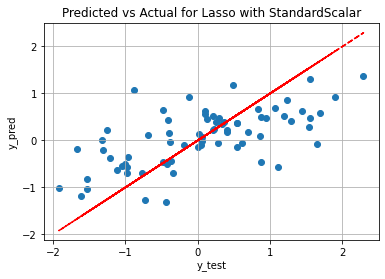

In [63]:
# from chatGPT!

import numpy as np
import matplotlib.pyplot as plt

def plot_predictions(y_test, y_pred, descrip_of_run):
    # Check if the arrays have the same length
    if len(y_test) != len(y_pred):
        raise ValueError("The input arrays must have the same length.")

    # Create a scatter plot
    plt.scatter(y_test, y_pred)
    plt.plot(y_test, y_test, color='red', linestyle='--')  # Line y_pred = y_test
    plt.xlabel('y_test')
    plt.ylabel('y_pred')
    plt.title('Predicted vs Actual for ' + descrip_of_run)
    plt.grid(True)
    plt.show()

# Example usage
# y_test = np.array([1, 2, 3, 4, 5])
# y_pred = np.array([1.1, 1.9, 3.2, 3.8, 4.9])

plot_predictions(y_testST, y_predST, 'Lasso with StandardScalar')


## Linear regression

In [64]:
linearST = LinearRegression()

In [65]:
print(type(y_trainST))

linearST.fit(X_trainST,y_trainST)

<class 'numpy.ndarray'>


LinearRegression()

3.6544712411440146
1.9116671365967493
-13.2110139639169


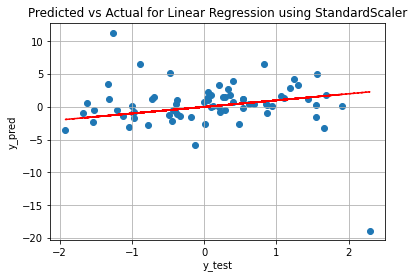

In [76]:
y_predST = linearST.predict(X_testST)

rmseST = math.sqrt(mean_squared_error(y_testST, y_predST))
rrmseST = math.sqrt(rmseST)# (0.5)
r2ST = r2_score(y_testST, y_predST)
print(rmseST)
print(rrmseST)
print(r2ST)

plot_predictions(y_testST, y_predST, 'Linear Regression using StandardScaler')


### Min Max scalar

In [67]:
scalerXMM = MinMaxScaler().fit(X_train)
scaleryMM = MinMaxScaler().fit(y_train)

X_trainMM = scalerXMM.transform(X_train)
y_trainMM = scaleryMM.transform(y_train)
X_testMM = scalerXMM.transform(X_test)
y_testMM = scaleryMM.transform(y_test)



In [68]:
# testing how inverse of the scaling is working with MinMaxScaler

# print(df_ml.iloc[7397]['yield'])   #  the first entry in y_test has index 1277 from df_ml
print(y_testMM[0])
print(scaleryMM.inverse_transform(y_testMM)[0])

[0.50960307]
[51.3]


0.6504986556817687
1.3009973113635374
-13.313037736814666


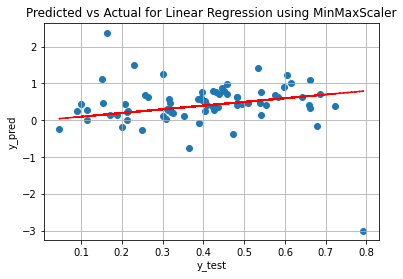

In [69]:
linearMM = LinearRegression()

linearMM.fit(X_trainMM,y_trainMM)

y_predMM = linearMM.predict(X_testMM)

rmseMM = math.sqrt(mean_squared_error(y_testMM, y_predMM))
rrmseMM = rmseMM / (0.5)
r2MM = r2_score(y_testMM, y_predMM)
print(rmseMM)
print(rrmseMM)
print(r2MM)


plot_predictions(y_testMM, y_predMM, 'Linear Regression using MinMaxScaler')



## Random Forest

0.1110224578208195
0.222044915641639
0.5830723626851338


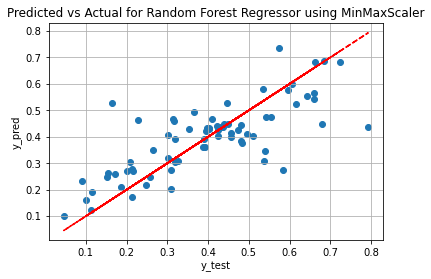

In [74]:
# random forest regressor
# regrMM = RandomForestRegressor(max_depth=2, random_state=0)
#   with depth 2
# 0.09689507428739876
# 0.1937901485747975
# 0.3314909449993473
# regrMM = RandomForestRegressor(max_depth=10, random_state=0)
#   with depth 10:
# 0.06397662809467218
# 0.12795325618934436
# 0.7085617250365808
regrMM = RandomForestRegressor(max_depth=30, random_state=0)
# 0.11031130262769574
# 0.22062260525539149
# 0.5883965221916605
#   with depth 20:
# 0.06170941135743185
# 0.1234188227148637
# 0.7288518150799632

# with depth 30:
# 0.06173892378020676
# 0.12347784756041352
# 0.7285924007306489

# for some reason, need to use y_trainMM.ravel() rather than simply y_trainMM
regrMM.fit(X_trainMM, y_trainMM.ravel())

y_predMM = regrMM.predict(X_testMM)
rmseMM = math.sqrt(mean_squared_error(y_testMM, y_predMM))
rrmseMM = rmseMM / (0.5)
r2MM = r2_score(y_testMM, y_predMM)
print(rmseMM)
print(rrmseMM)
print(r2MM)


plot_predictions(y_testMM, y_predMM, 'Random Forest Regressor using MinMaxScaler')


0.13039511983442179
0.26079023966884357
0.42487574309031173


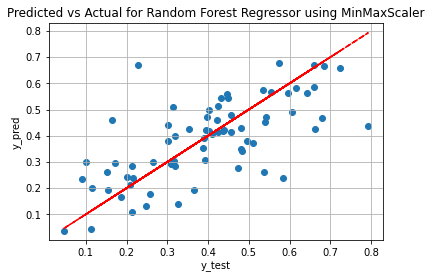

In [72]:
# Gradient Boost regressor
# regrMM = GradientBoostingRegressor(max_depth=2, random_state=0)
#   with depth 2
# 0.09689507428739876
# 0.1937901485747975
# 0.3314909449993473
regrMM = GradientBoostingRegressor(max_depth=10, random_state=0)
#   with depth 10:
# 0.06397662809467218
# 0.12795325618934436
# 0.7085617250365808
# regrMM = GradientBoostingRegressor(max_depth=20, random_state=0)
#   with depth 20:
# 0.06170941135743185
# 0.1234188227148637
# 0.7288518150799632

# with depth 30:
# 0.06173892378020676
# 0.12347784756041352
# 0.7285924007306489

# for some reason, need to use y_trainMM.ravel() rather than simply y_trainMM
regrMM.fit(X_trainMM, y_trainMM.ravel())

y_predMM = regrMM.predict(X_testMM)
rmseMM = math.sqrt(mean_squared_error(y_testMM, y_predMM))
rrmseMM = rmseMM / (0.5)
r2MM = r2_score(y_testMM, y_predMM)
print(rmseMM)
print(rrmseMM)
print(r2MM)


plot_predictions(y_testMM, y_predMM, 'Random Forest Regressor using MinMaxScaler')